In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [4]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
data.shape

(32560, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
# No Null values

In [9]:
data.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
#EDA

In [11]:
data[data.columns[0]].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [12]:
for i in range(0,15):
    print(f"{data.columns[i]} = {data[data.columns[i]].nunique()}")
    print(f"{data.columns[i]} = {data[data.columns[i]].unique()}")

Age = 73
Age = [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Workclass = 9
Workclass = [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Fnlwgt = 21647
Fnlwgt = [ 83311 215646 234721 ...  34066  84661 257302]
Education = 16
Education = [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Education_num = 16
Education_num = [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Marital_status = 7
Marital_status = [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation = 15
Occupation = [' Exec-managerial' ' Handlers-cleaners' ' Prof-

In [13]:
# Workclass, Occupation and Native_country have '?' as value in some places. need to treat this.

In [14]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [15]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [16]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [17]:
a = data['Workclass'].mode()[0]

In [18]:
data['Workclass'] = data['Workclass'].replace(' ?',a)

In [19]:
data.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [20]:
data['Occupation'] = data['Occupation'].replace(' ?',data['Occupation'].mode()[0])

In [21]:
data.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [22]:
data['Native_country'] = data['Native_country'].replace(' ?',data['Native_country'].mode()[0])

In [23]:
data.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [24]:
data.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [25]:
c = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

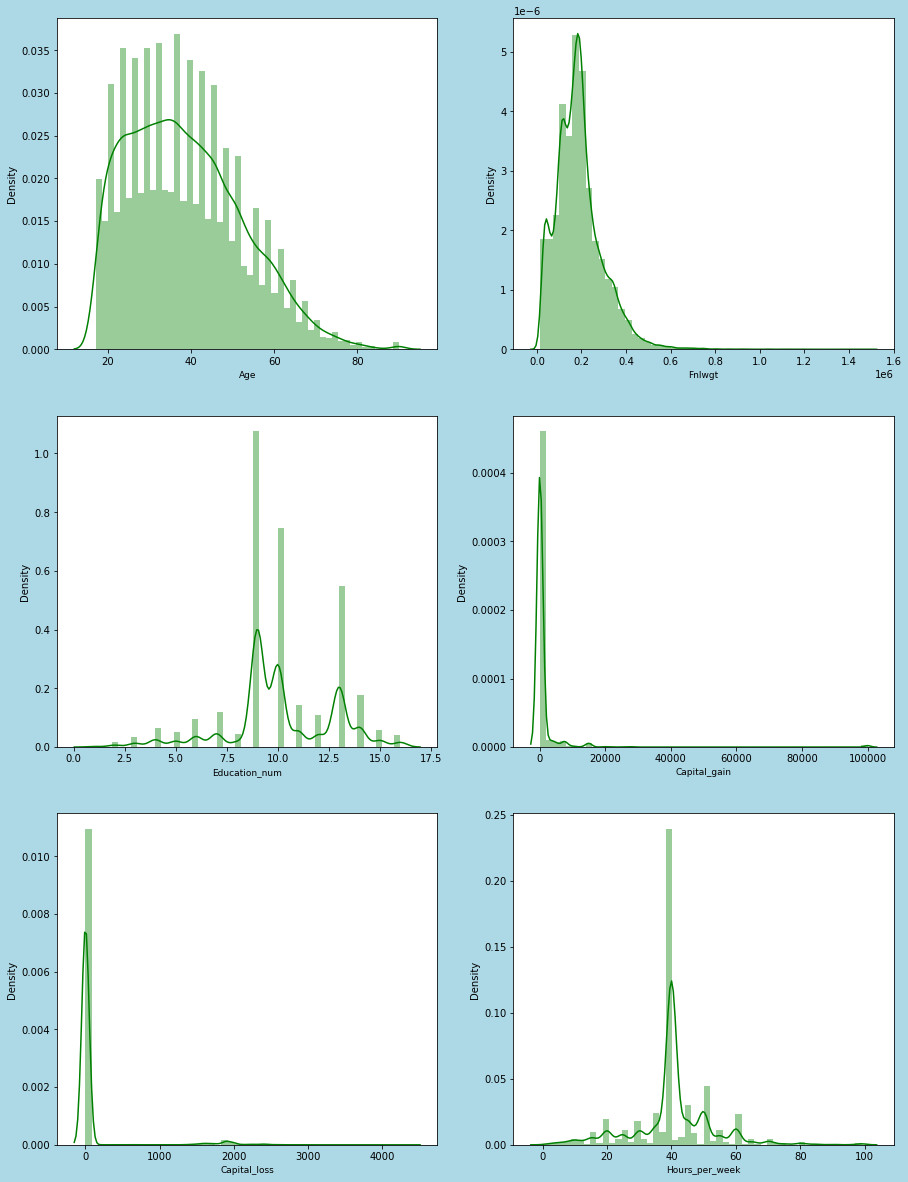

In [26]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in c:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.distplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [27]:
# Fnlwgt, Capital_gain and Capital_loss have skewness

In [28]:
d = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship',
     'Race', 'Sex', 'Native_country', 'Income'] 

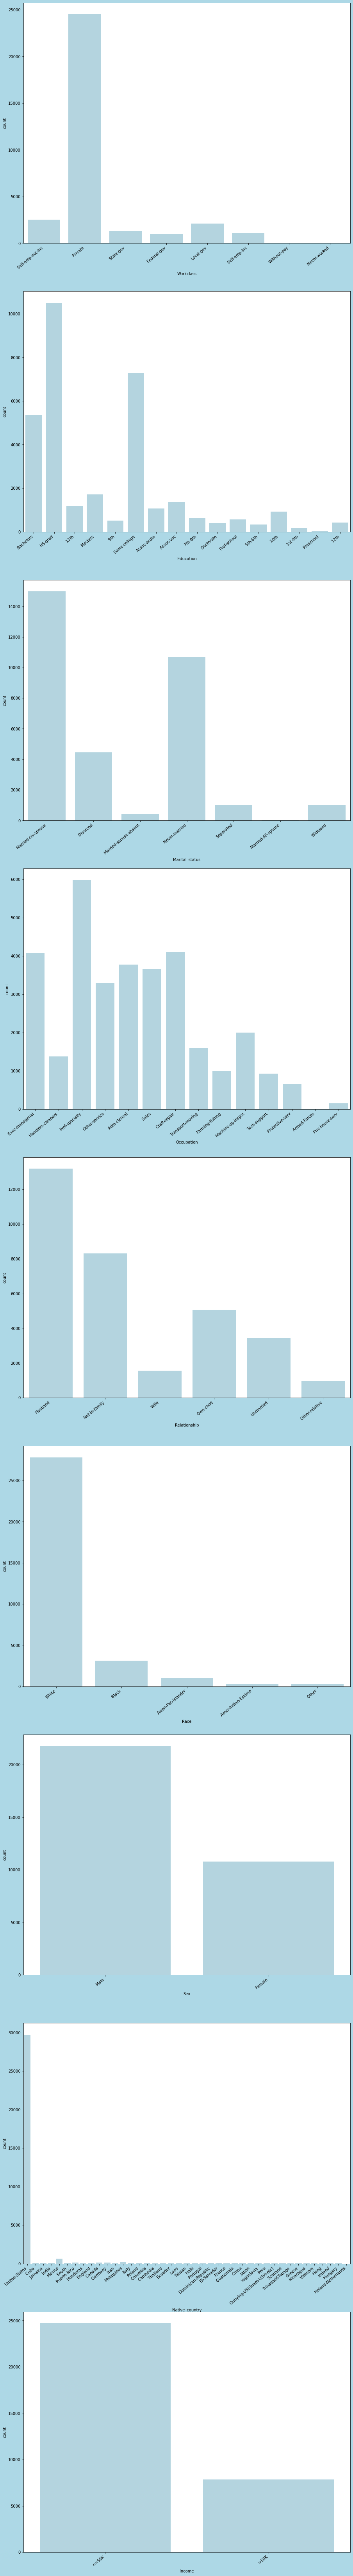

In [29]:
plt.figure(figsize=(15,120),facecolor='lightblue')
plotnumber = 1


for column in d:
    if plotnumber<=9:
        ax=plt.subplot(9,1,plotnumber)
        sns.countplot(data[column], color = 'lightblue')
        plt.xlabel(column,fontsize=10)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        
    plotnumber+=1
plt.show()

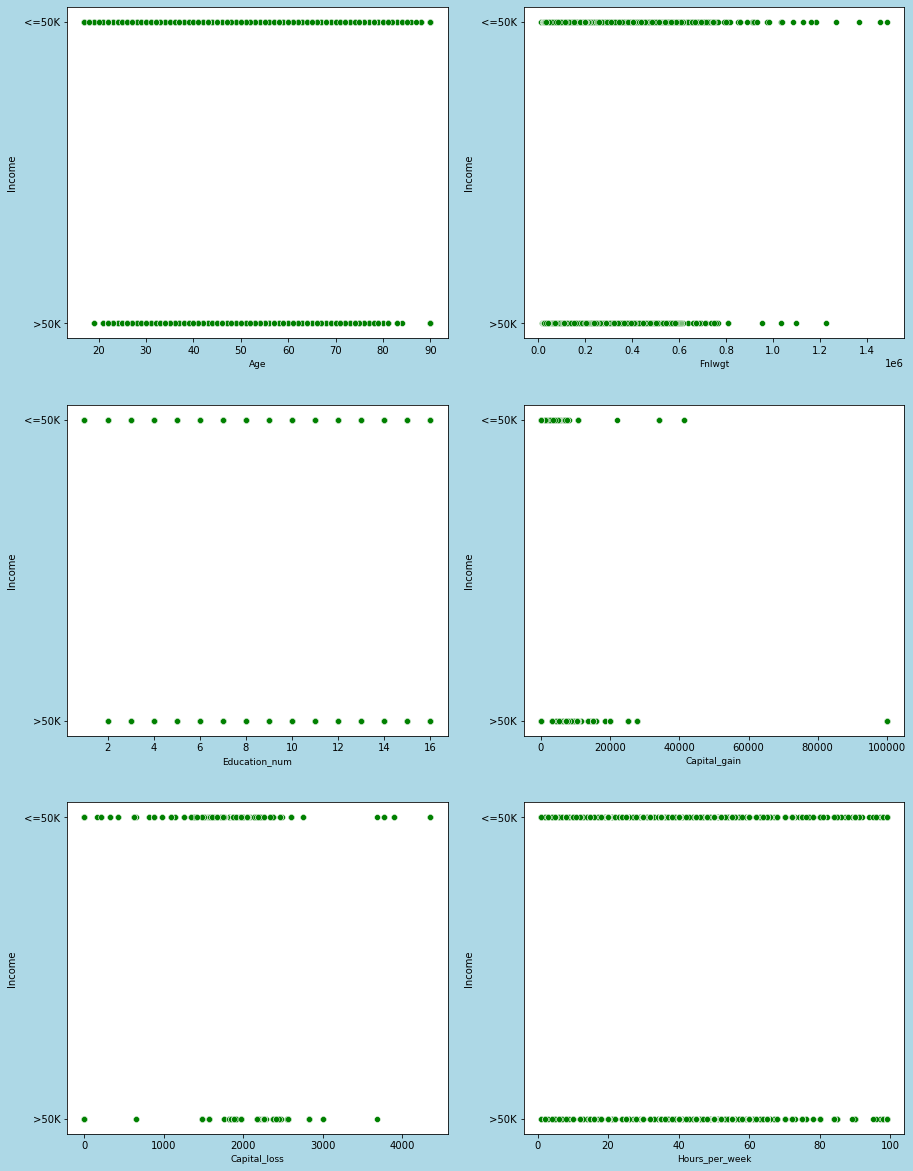

In [30]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in c:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.scatterplot(data[column],data['Income'],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

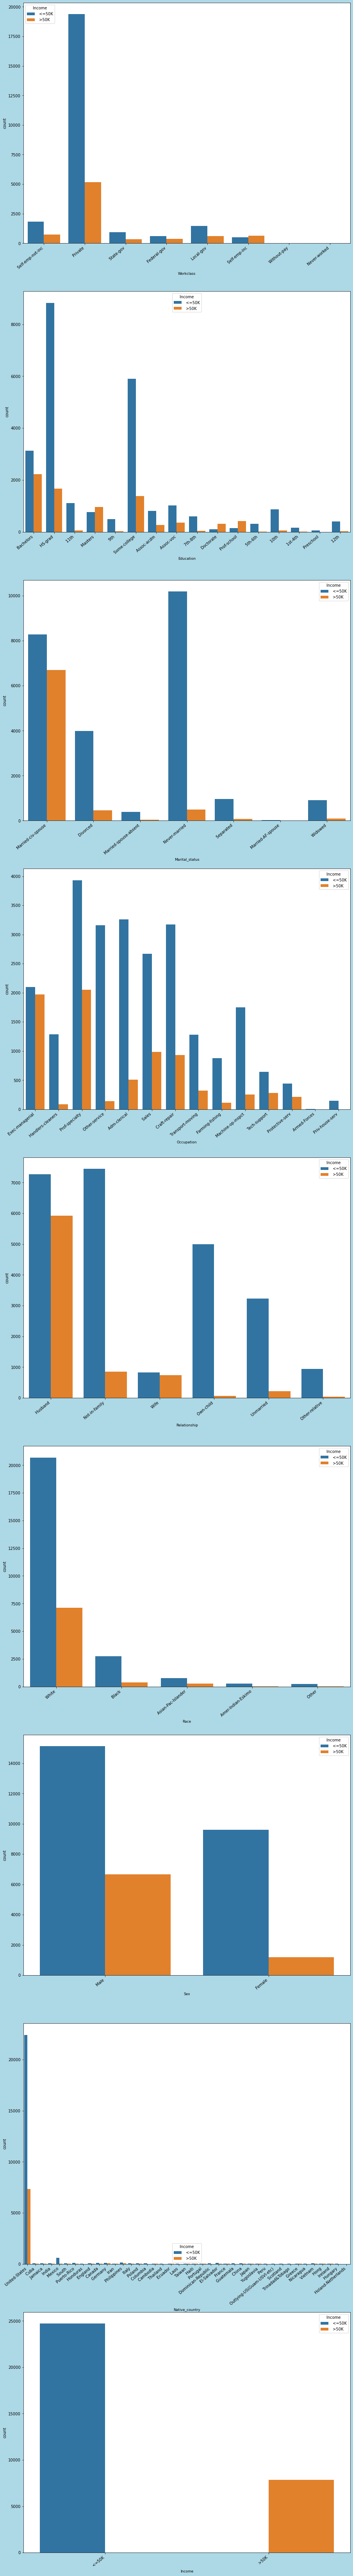

In [31]:
plt.figure(figsize=(15,120),facecolor='lightblue')
plotnumber = 1


for column in d:
    if plotnumber<=9:
        ax=plt.subplot(9,1,plotnumber)
        sns.countplot(data[column],hue = data['Income'])
        plt.xlabel(column,fontsize=9)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        
    plotnumber+=1
plt.show()

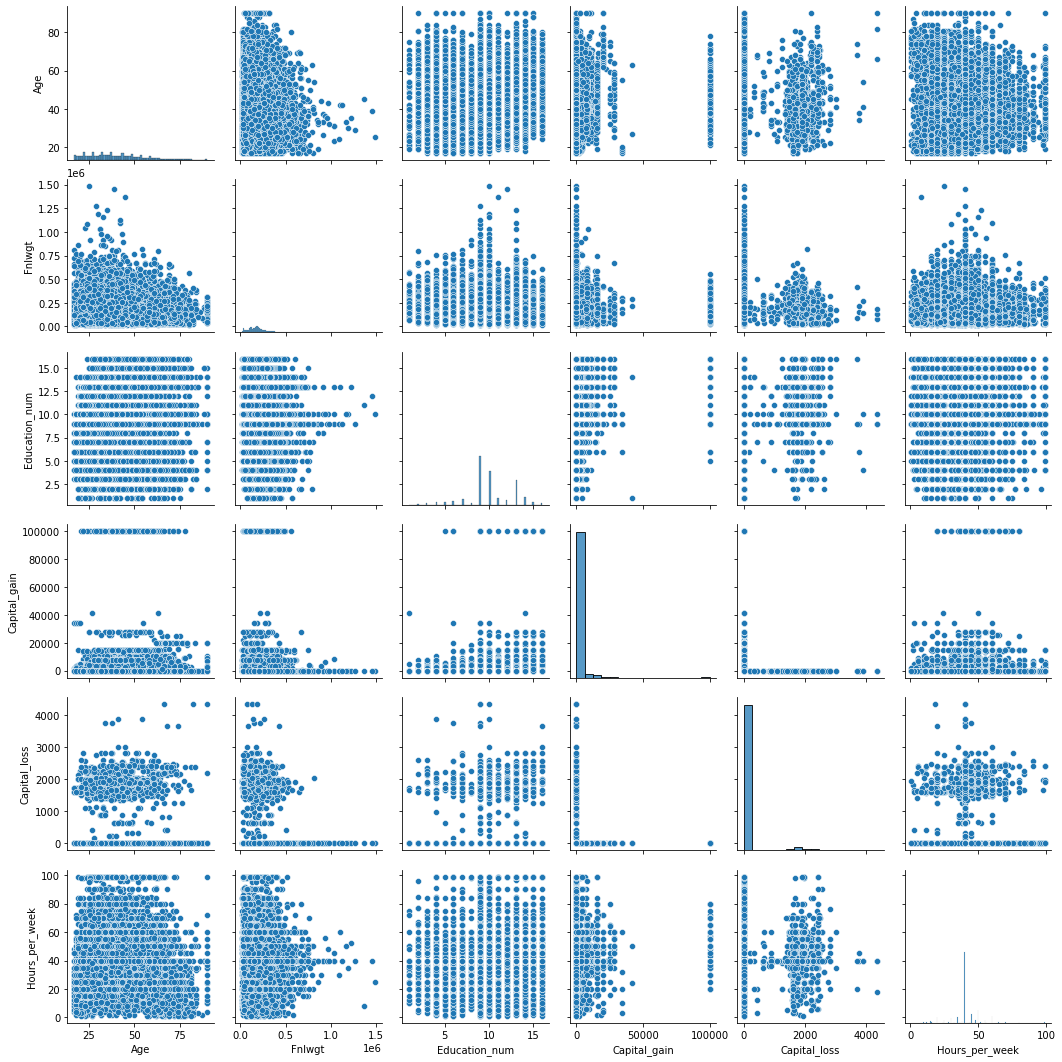

In [32]:
sns.pairplot(data)

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
for i in data.columns:
    if data[i].dtypes == 'object':
        enco = OrdinalEncoder(categories=[data[i].unique()])
        data[i] = enco.fit_transform(data[[i]])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  float64
 6   Occupation      32560 non-null  float64
 7   Relationship    32560 non-null  float64
 8   Race            32560 non-null  float64
 9   Sex             32560 non-null  float64
 10  Capital_gain    32560 non-null  int64  
 11  Capital_loss    32560 non-null  int64  
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  float64
 14  Income          32560 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 3.7 MB


In [36]:
for i in data.columns:
    print( data[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
1.0    24532
0.0     2541
4.0     2093
2.0     1297
5.0     1116
3.0      960
6.0       14
7.0        7
Name: Workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
1.0     10501
5.0      7291
0.0      5354
3.0      1723
7.0      1382
2.0      1175
6.0      1067
12.0      933
8.0       646
10.0      576
4.0       514
15.0      433
9.0       413
11.0      333
13.0      168
14.0       51
Name: Education, dtype: int64
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64
0.0    14976
3.0    10682
1.0     4443
4.0     1025
6.0

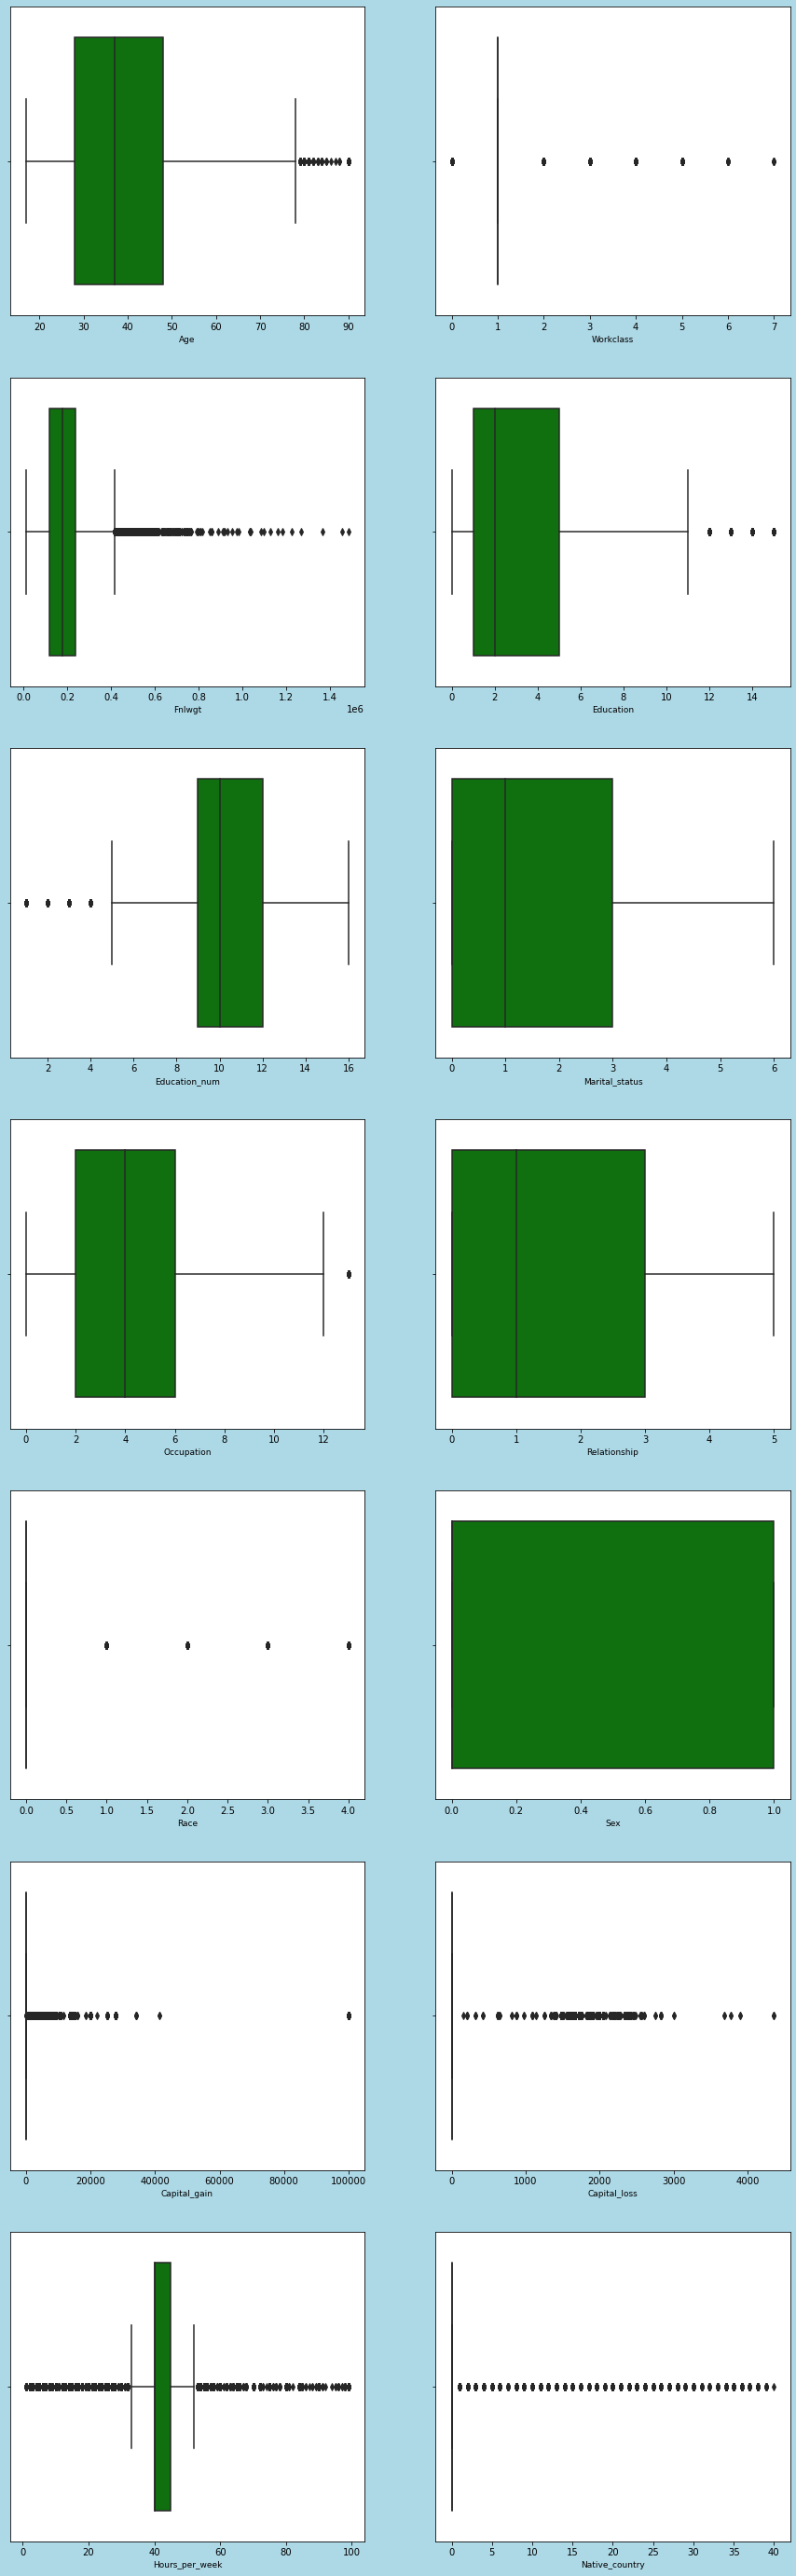

In [37]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [38]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [39]:
Age_high = q3.Age + (1.5 * (iqr.Age))
Age_low = q1.Age - (1.5 * (iqr.Age))
Drop_Age = np.where((data.Age > Age_high) | (data.Age < Age_low) )
Drop_Age
data = data.drop(data.index[Drop_Age])
data.shape
data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,0.0,83311,0.0,13,0.0,0.0,0.0,0.0,0.0,0,0,13,0.0,0.0
1,1,38,1.0,215646,1.0,9,1.0,1.0,1.0,0.0,0.0,0,0,40,0.0,0.0
2,2,53,1.0,234721,2.0,7,0.0,1.0,0.0,1.0,0.0,0,0,40,0.0,0.0
3,3,28,1.0,338409,0.0,13,0.0,2.0,2.0,1.0,1.0,0,0,40,1.0,0.0
4,4,37,1.0,284582,3.0,14,0.0,0.0,2.0,0.0,1.0,0,0,40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32412,32555,27,1.0,257302,6.0,12,0.0,10.0,2.0,0.0,1.0,0,0,38,0.0,0.0
32413,32556,40,1.0,154374,1.0,9,0.0,9.0,0.0,0.0,0.0,0,0,40,0.0,1.0
32414,32557,58,1.0,151910,1.0,9,6.0,4.0,4.0,0.0,1.0,0,0,40,0.0,0.0
32415,32558,22,1.0,201490,1.0,9,3.0,4.0,3.0,0.0,0.0,0,0,20,0.0,0.0


In [40]:
Education_high = q3.Education + (1.5 * (iqr.Education))
Education_low = q1.Education - (1.5 * (iqr.Education))
Drop_Education = np.where((data.Education > Education_high) | (data.Education < Education_low) )
Drop_Education
data = data.drop(data.index[Drop_Education])
data.shape
data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,0.0,83311,0.0,13,0.0,0.0,0.0,0.0,0.0,0,0,13,0.0,0.0
1,1,38,1.0,215646,1.0,9,1.0,1.0,1.0,0.0,0.0,0,0,40,0.0,0.0
2,2,53,1.0,234721,2.0,7,0.0,1.0,0.0,1.0,0.0,0,0,40,0.0,0.0
3,3,28,1.0,338409,0.0,13,0.0,2.0,2.0,1.0,1.0,0,0,40,1.0,0.0
4,4,37,1.0,284582,3.0,14,0.0,0.0,2.0,0.0,1.0,0,0,40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30836,32555,27,1.0,257302,6.0,12,0.0,10.0,2.0,0.0,1.0,0,0,38,0.0,0.0
30837,32556,40,1.0,154374,1.0,9,0.0,9.0,0.0,0.0,0.0,0,0,40,0.0,1.0
30838,32557,58,1.0,151910,1.0,9,6.0,4.0,4.0,0.0,1.0,0,0,40,0.0,0.0
30839,32558,22,1.0,201490,1.0,9,3.0,4.0,3.0,0.0,0.0,0,0,20,0.0,0.0


In [41]:
Hours_per_week_high = q3.Hours_per_week + (1.5 * (iqr.Hours_per_week))
Hours_per_week_low = q1.Hours_per_week - (1.5 * (iqr.Hours_per_week))
Drop_Hours_per_week = np.where((data.Hours_per_week > Hours_per_week_high) | (data.Hours_per_week < Hours_per_week_low) )
Drop_Hours_per_week
data = data.drop(data.index[Drop_Hours_per_week])
data.shape
data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,1.0,215646,1.0,9,1.0,1.0,1.0,0.0,0.0,0,0,40,0.0,0.0
1,2,53,1.0,234721,2.0,7,0.0,1.0,0.0,1.0,0.0,0,0,40,0.0,0.0
2,3,28,1.0,338409,0.0,13,0.0,2.0,2.0,1.0,1.0,0,0,40,1.0,0.0
3,4,37,1.0,284582,3.0,14,0.0,0.0,2.0,0.0,1.0,0,0,40,0.0,0.0
4,6,52,0.0,209642,1.0,9,0.0,0.0,0.0,0.0,0.0,0,0,45,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22461,32554,22,1.0,310152,5.0,10,3.0,11.0,1.0,0.0,0.0,0,0,40,0.0,0.0
22462,32555,27,1.0,257302,6.0,12,0.0,10.0,2.0,0.0,1.0,0,0,38,0.0,0.0
22463,32556,40,1.0,154374,1.0,9,0.0,9.0,0.0,0.0,0.0,0,0,40,0.0,1.0
22464,32557,58,1.0,151910,1.0,9,6.0,4.0,4.0,0.0,1.0,0,0,40,0.0,0.0


In [42]:
data.shape

(22466, 15)

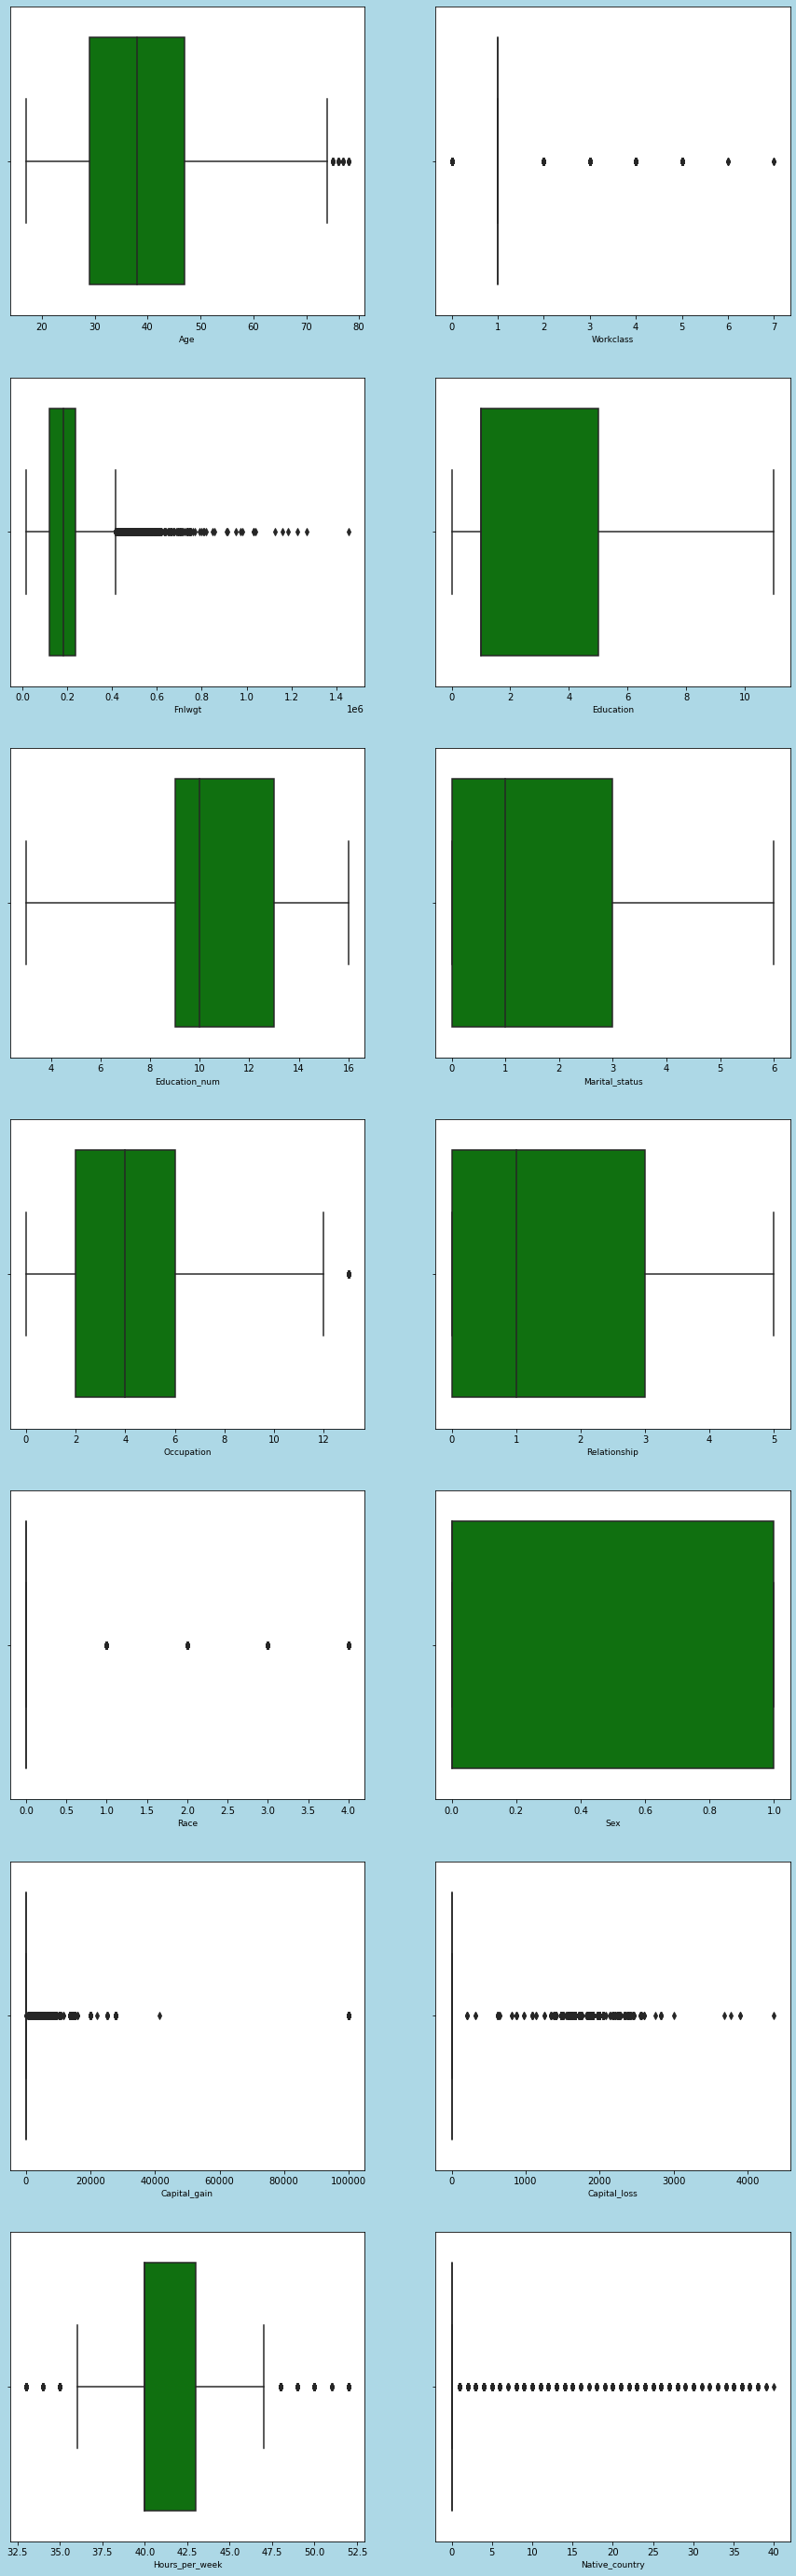

In [43]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [44]:
# Most of the outliers have been treated. Some outliers have not treated since that will become a one value.

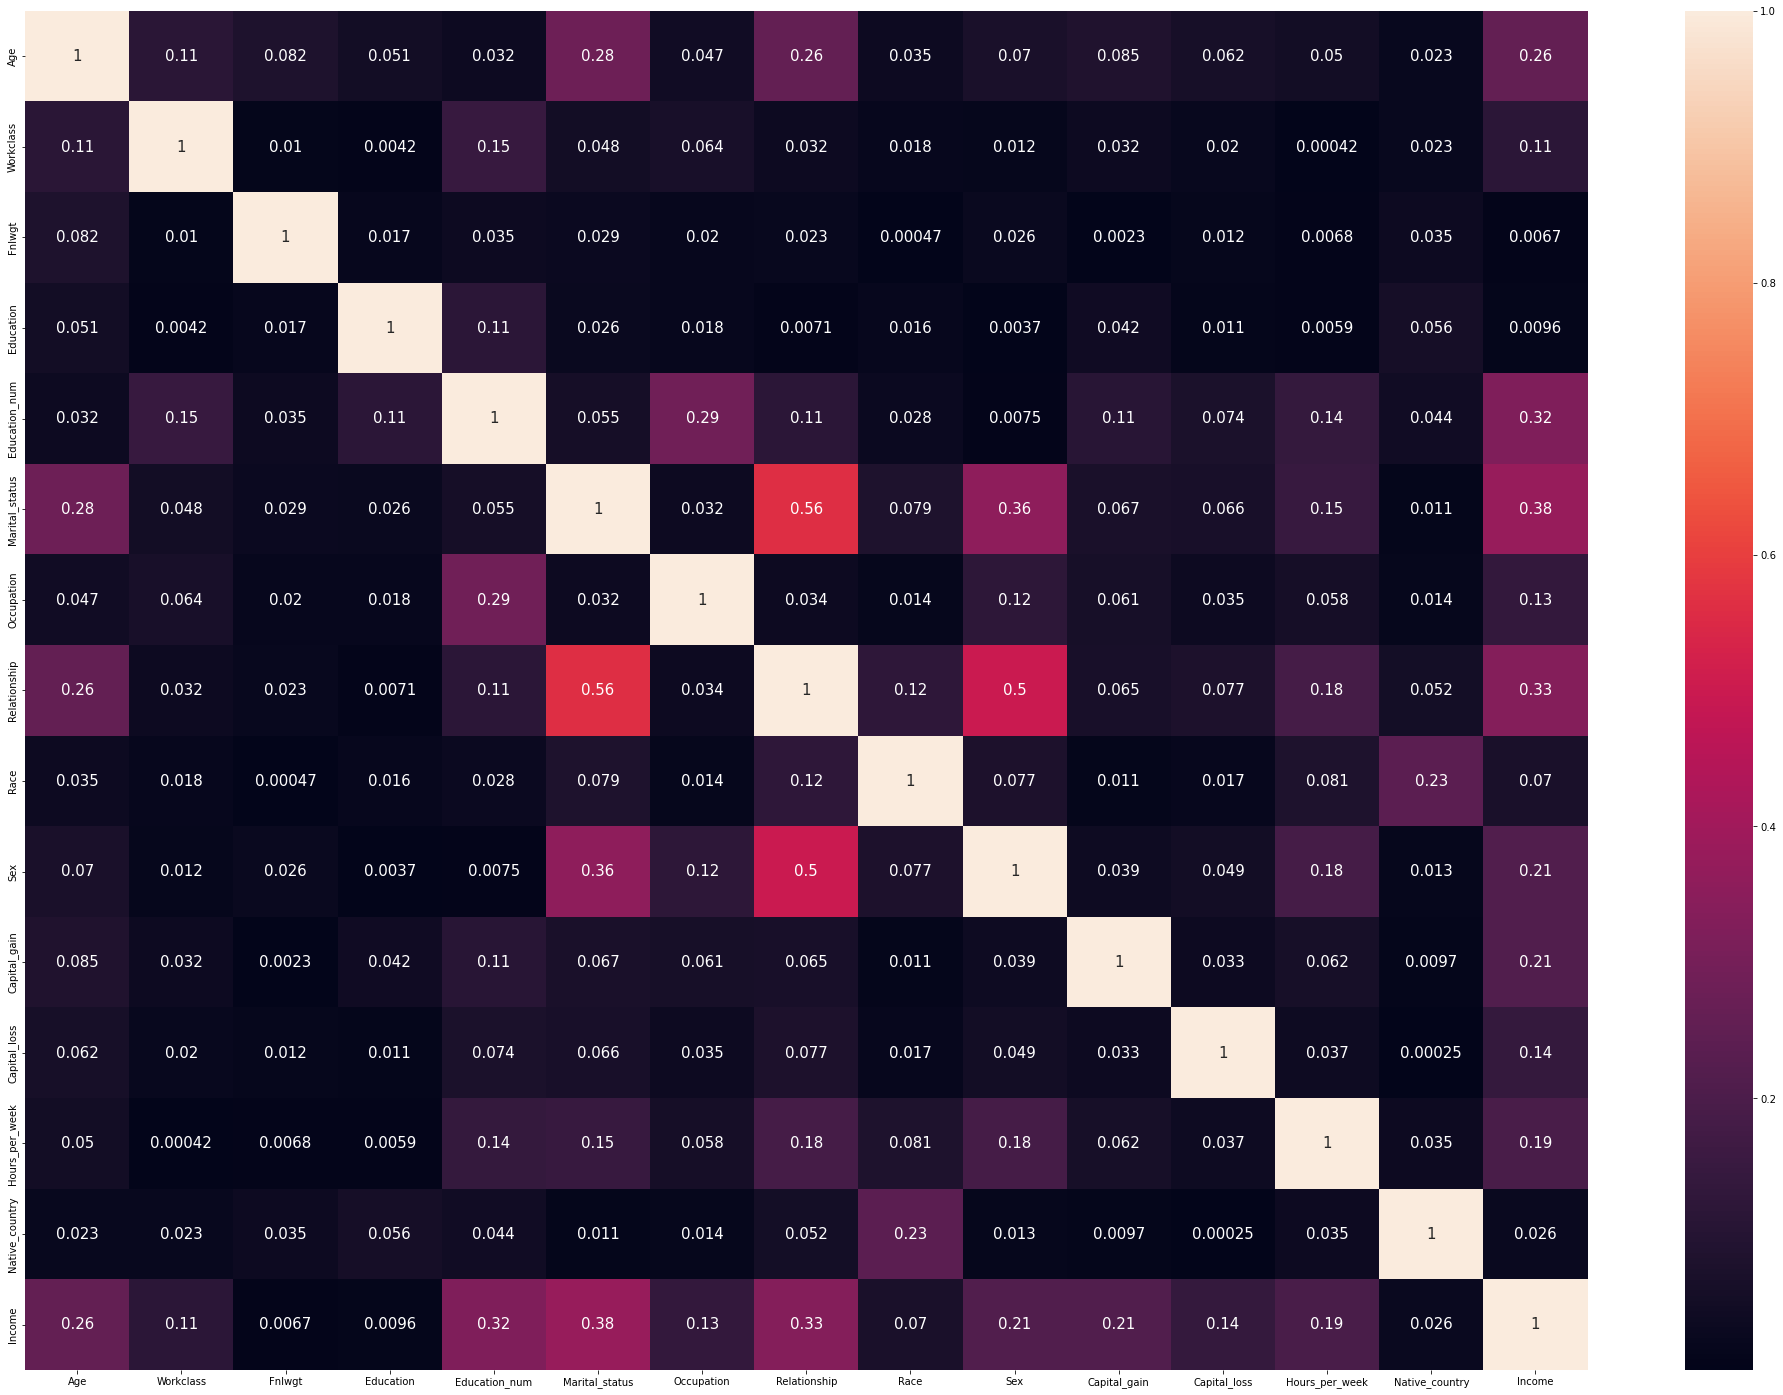

In [45]:
df_corr = data.corr().abs()

plt.figure(figsize =(35, 25))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :15})
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

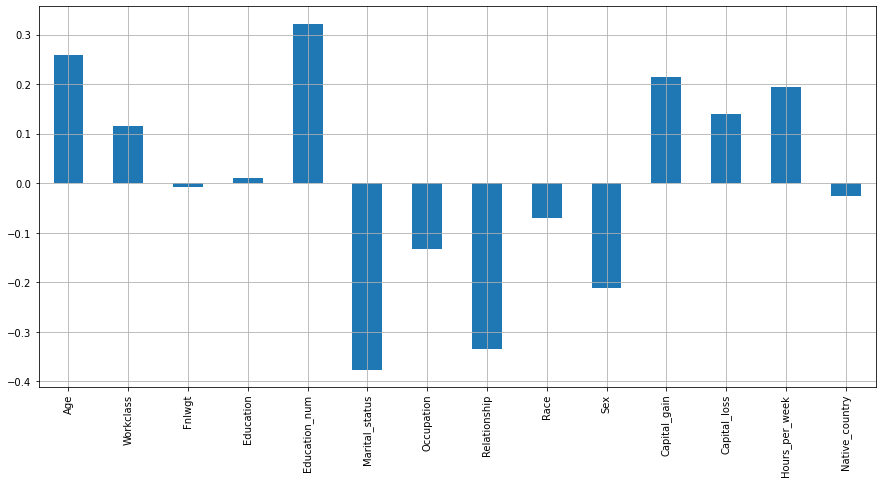

In [47]:
data.drop('Income',axis =1).corrwith(data.Income).plot(kind = 'bar', grid=True, figsize = (15,7))

In [48]:
# dropping the features which has less than 1 except FnlWgt. 
# dropping Education, Race & Native_country

In [49]:
data = data.drop(columns =['Education','Race','Native_country'],axis =1)

In [50]:
data.shape

(22466, 12)

In [51]:
from scipy.stats import zscore
import numpy as np
z_score =zscore(data[['Fnlwgt']])
scaled_z_score = np.abs(z_score)
filtering_entry =(scaled_z_score <3).all(axis=1)
data = data[filtering_entry]

In [52]:
x = data.drop(columns = ['Income'],axis =1)
y = data.Income

In [53]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.137060,Age
1,1.035427,Workclass
2,1.008421,Fnlwgt
3,1.160131,Education_num
4,1.527052,Marital_status
5,1.116231,Occupation
6,1.781233,Relationship
7,1.402581,Sex
8,1.026073,Capital_gain
9,1.016110,Capital_loss


In [55]:
# all values are less than 5. SO there is no multicollinearity exists

In [56]:
from scipy.stats import skew

In [57]:
# Consider skew map only for continuous feature.

Age
0.4152550622681996


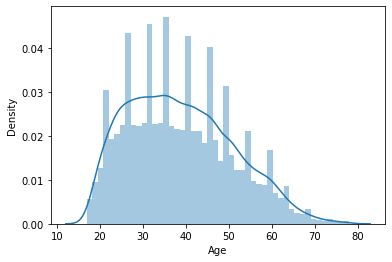

Workclass
1.9580702281661035


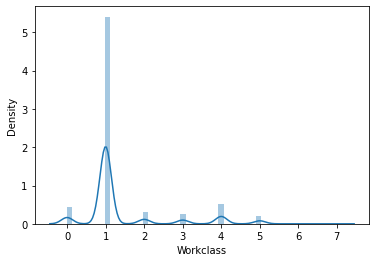

Fnlwgt
0.6339958029552839


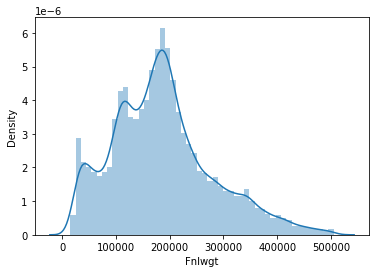

Education_num
-0.25319173617758184


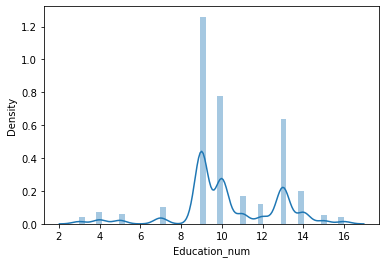

Marital_status
0.82777624788832


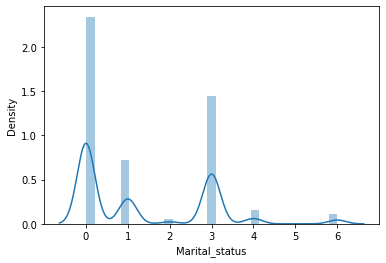

Occupation
0.4114269948882306


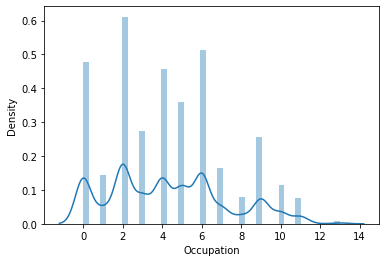

Relationship
0.914707096902393


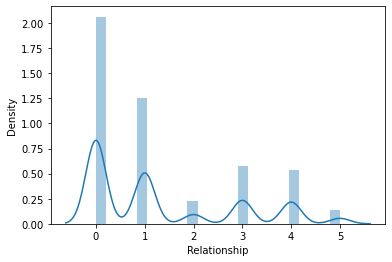

Sex
0.7978473234116543


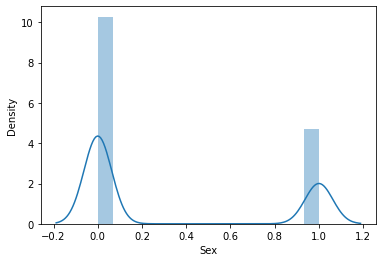

Capital_gain
12.753546784394844


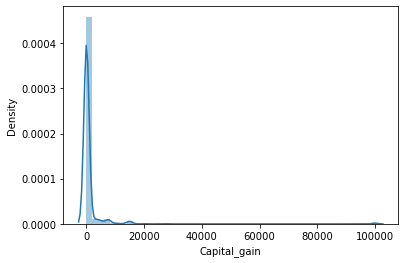

Capital_loss
4.4681503373056435


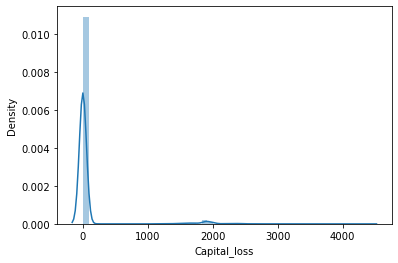

Hours_per_week
1.0129956768973427


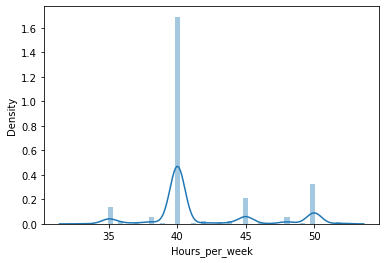

In [58]:
for col in x:
    print(col)
    print(skew(x[col]))
    
    plt.figure()
    sns.distplot(x[col])
    plt.show()

In [59]:
# we have Skewness on Fnlwgt, Capital_loss and Capital_gain. That will be treated while handling Imbalanced datatset.

In [60]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [61]:
balanced_x,balanced_y=smt.fit_resample(x_scaled, y)

In [62]:
balanced_x.shape

(32752, 11)

In [63]:
balanced_y.shape

(32752,)

In [65]:
#selction of Random state

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LogisticRegression

In [67]:
lg = LogisticRegression()

In [69]:
for i in range(0,101):
    x_train,x_test,y_train,y_test = train_test_split(balanced_x,balanced_y,train_size = 0.75,random_state = i)
    lg.fit(x_train, y_train)
    predict_train = lg.predict(x_train)
    predict_test = lg.predict(x_test)
    print(f"At random state {i}, the train set accuracy is ",{accuracy_score(y_train,predict_train)})
    print(f"At random state {i}, the test set accuracy is ",{accuracy_score(y_test,predict_test)})

At random state 0, the train set accuracy is  {0.7952287900993323}
At random state 0, the test set accuracy is  {0.7988519785051295}
At random state 1, the train set accuracy is  {0.7933561309233024}
At random state 1, the test set accuracy is  {0.8043478260869565}
At random state 2, the train set accuracy is  {0.7961651196873474}
At random state 2, the test set accuracy is  {0.7971421592574499}
At random state 3, the train set accuracy is  {0.7951473701351571}
At random state 3, the test set accuracy is  {0.800561797752809}
At random state 4, the train set accuracy is  {0.7971421592574499}
At random state 4, the test set accuracy is  {0.7927454811919883}
At random state 5, the train set accuracy is  {0.7969793193290995}
At random state 5, the test set accuracy is  {0.7948216902784563}
At random state 6, the train set accuracy is  {0.7979156489171145}
At random state 6, the test set accuracy is  {0.7938446507083536}
At random state 7, the train set accuracy is  {0.7969793193290995}
At 

In [70]:
# at random state 76, the model perfroms well.So random state is 76
x_train,x_test,y_train,y_test = train_test_split(balanced_x,balanced_y,train_size = 0.75,random_state = 76)
lg.fit(x_train, y_train)
predict_train = lg.predict(x_train)
predict_test = lg.predict(x_test)
print(f"The train set accuracy is ",{accuracy_score(y_train,predict_train)})
print(f"The test set accuracy is ",{accuracy_score(y_test,predict_test)})

The train set accuracy is  {0.7983634587200782}
The test set accuracy is  {0.79152418172936}


In [71]:
#Model

In [72]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train, y_train)
    if train:
        train_pred = clf.predict(x_train)
        print("\n===================Train Results============")
        print('Accuracy:', accuracy_score(y_train, train_pred)*100,'% \n')
        print("\n Test Classification Report -\n", classification_report(y_train, train_pred, digits = 2))
        
    elif train == False:
        test_pred = clf.predict(x_test)
        print("\n===================Test Results============")
        print('Accuracy:', accuracy_score(y_test, test_pred)*100,'%\n')
        print("\n Test Classification Report -\n", classification_report(y_test, test_pred, digits = 2))

In [73]:
metric_score(lg,x_train,x_test,y_train,y_test, train = True)
metric_score(lg,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 79.83634587200783 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.81      0.78      0.79     12237
         1.0       0.79      0.82      0.80     12327

    accuracy                           0.80     24564
   macro avg       0.80      0.80      0.80     24564
weighted avg       0.80      0.80      0.80     24564


===================Test Results============
Accuracy: 79.152418172936 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      4139
         1.0       0.78      0.81      0.79      4049

    accuracy                           0.79      8188
   macro avg       0.79      0.79      0.79      8188
weighted avg       0.79      0.79      0.79      8188



In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [75]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gbr = GradientBoostingClassifier()

In [76]:
# Random Forest

In [77]:
metric_score(rf,x_train,x_test,y_train,y_test, train = True)
metric_score(rf,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12237
         1.0       1.00      1.00      1.00     12327

    accuracy                           1.00     24564
   macro avg       1.00      1.00      1.00     24564
weighted avg       1.00      1.00      1.00     24564


===================Test Results============
Accuracy: 88.1533952125061 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      4139
         1.0       0.87      0.89      0.88      4049

    accuracy                           0.88      8188
   macro avg       0.88      0.88      0.88      8188
weighted avg       0.88      0.88      0.88      8188



In [78]:
# Decision Tree
metric_score(dt,x_train,x_test,y_train,y_test, train = True)
metric_score(dt,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12237
         1.0       1.00      1.00      1.00     12327

    accuracy                           1.00     24564
   macro avg       1.00      1.00      1.00     24564
weighted avg       1.00      1.00      1.00     24564


===================Test Results============
Accuracy: 84.4894968246214 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      4139
         1.0       0.83      0.86      0.85      4049

    accuracy                           0.84      8188
   macro avg       0.85      0.85      0.84      8188
weighted avg       0.85      0.84      0.84      8188



In [79]:
#knn
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 89.12636378439993 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.95      0.83      0.88     12237
         1.0       0.85      0.95      0.90     12327

    accuracy                           0.89     24564
   macro avg       0.90      0.89      0.89     24564
weighted avg       0.90      0.89      0.89     24564


===================Test Results============
Accuracy: 83.59794821690278 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      4139
         1.0       0.79      0.91      0.85      4049

    accuracy                           0.84      8188
   macro avg       0.84      0.84      0.84      8188
weighted avg       0.84      0.84      0.84      8188



In [80]:
# Gradient Boost 
metric_score(gbr,x_train,x_test,y_train,y_test, train = True)
metric_score(gbr,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 86.26852304184986 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.88      0.84      0.86     12237
         1.0       0.85      0.89      0.87     12327

    accuracy                           0.86     24564
   macro avg       0.86      0.86      0.86     24564
weighted avg       0.86      0.86      0.86     24564


===================Test Results============
Accuracy: 85.56424035173424 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      4139
         1.0       0.83      0.89      0.86      4049

    accuracy                           0.86      8188
   macro avg       0.86      0.86      0.86      8188
weighted avg       0.86      0.86      0.86      8188



In [81]:
# Gradient Boosting Decision Tree gives the high accuracy SO ths model has been selected as final model

In [82]:
from sklearn.model_selection import KFold,cross_val_score

In [83]:
cross_val_score(gbr,balanced_x,balanced_y, cv = 5)

array([0.81208976, 0.8320867 , 0.86931298, 0.87679389, 0.87572519])

In [84]:
cross_val_score(gbr,x_scaled, y, cv = 5).mean()

0.8535883014623172

In [ ]:
# no overfitting exist

In [85]:
# Hyperparameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
grid_param = {'max_depth' : range (4,8),
             'min_samples_split' : range (2,8,2),
             'learning_rate' : np.arange (0.1,0.5)}

In [88]:
grid = GridSearchCV(gbr, param_grid = grid_param)
grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [89]:
best = grid.best_params_
best

{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2}

In [90]:
grid_model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 7, min_samples_split= 2)

In [91]:
grid_model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=7)

In [92]:
metric_score(grid_model,x_train,x_test,y_train,y_test, train = True)
metric_score(grid_model,x_train,x_test,y_train,y_test, train = False)


===================Train Results============
Accuracy: 91.70330565054552 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.93      0.90      0.92     12237
         1.0       0.91      0.93      0.92     12327

    accuracy                           0.92     24564
   macro avg       0.92      0.92      0.92     24564
weighted avg       0.92      0.92      0.92     24564


===================Test Results============
Accuracy: 88.5075720566683 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      4139
         1.0       0.87      0.91      0.89      4049

    accuracy                           0.89      8188
   macro avg       0.89      0.89      0.89      8188
weighted avg       0.89      0.89      0.89      8188



In [100]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

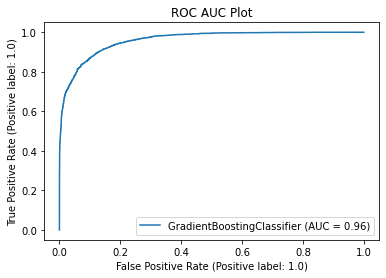

In [105]:
plot_roc_curve(grid_model,x_test,y_test)
plt.title('ROC AUC Plot')

Acheived ROC AUC = 96%

In [93]:
#saving the model

In [94]:
filename = 'Census Income'
pickle.dump(grid_model,open(filename,'wb'))

In [95]:
saved_mod = pickle.load(open(filename,'rb'))

In [96]:
saved_mod.predict(x_test)

array([1., 0., 1., ..., 0., 0., 0.])

In [97]:
y_test

21958    0.0
20363    0.0
17844    1.0
17555    0.0
3261     0.0
        ... 
9974     0.0
6966     0.0
15104    0.0
4630     0.0
30485    1.0
Name: Income, Length: 8188, dtype: float64

In [98]:
#prediction is almost close to the actual

In [99]:
#End of Project